# **Producto Interior Bruto**

## *Librerías*



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from sktime.forecasting.arima import AutoARIMA
from statsmodels.graphics import tsaplots
from sktime.utils.plotting import plot_correlations
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.transformations.series.boxcox import LogTransformer
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.transformations.series.difference import Differencer
from sktime.utils.plotting import plot_series
from sktime.forecasting.ets import AutoETS
warnings.filterwarnings('ignore')

C:\Users\alexg\anaconda3\lib\site-packages\sktime\utils\validation\series.py:22: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\alexg\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:25: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.TimedeltaIndex)
C:\Users\alexg\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:26: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.DatetimeIndex, pd.PeriodIndex)
C:\Users\alexg\anaconda3\lib\site-packages\sktime\datatypes\_series\_check.py:43: FutureWarning: pandas.Int64Index is deprecated and w

## *Lectura del CSV y preparación de los datos*
Se procede a leer el archivo CSV del PIB trimestral español:

- Fuente: Instituto Nacional de Estadística (INE)

In [32]:
df_pib = pd.read_csv("pibtrimestral.csv", sep = ";", encoding='latin-1')
df_pib


,Tipo de dato,Agregados macroeconómicos: Nivel 1,Agregados macroeconómicos: Nivel 2,Niveles y tasas,Periodo,Total
0,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1995T1,109.165
1,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1995T2,116.633
2,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1995T3,112.398
3,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1995T4,122.392
4,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1996T1,115.776
...,...,...,...,...,...,...
104,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2021T1,279.732
105,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2021T2,300.089
106,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2021T3,297.498
107,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2021T4,327.744


In [33]:
df_pib = df_pib.iloc[60:,-2:]
df_pib.head()

,Periodo,Total
60,2010T1,257.598
61,2010T2,273.434
62,2010T3,261.706
63,2010T4,279.971
64,2011T1,258.719
65,2011T2,272.481
66,2011T3,259.493
67,2011T4,273.070
68,2012T1,252.313
69,2012T2,262.527


In [34]:
df_pib['Periodo'] = df_pib['Periodo'].str.replace('T', '')
df_pib['Periodo'] = pd.to_datetime(df_pib['Periodo'], format='%Y%m')
df_pib = df_pib.set_index("Periodo")
df_pib.head()

,Total
Periodo,
2010-01-01,257.598
2010-02-01,273.434
2010-03-01,261.706
2010-04-01,279.971
2011-01-01,258.719



## *Graficación de la serie temporal y análisis*

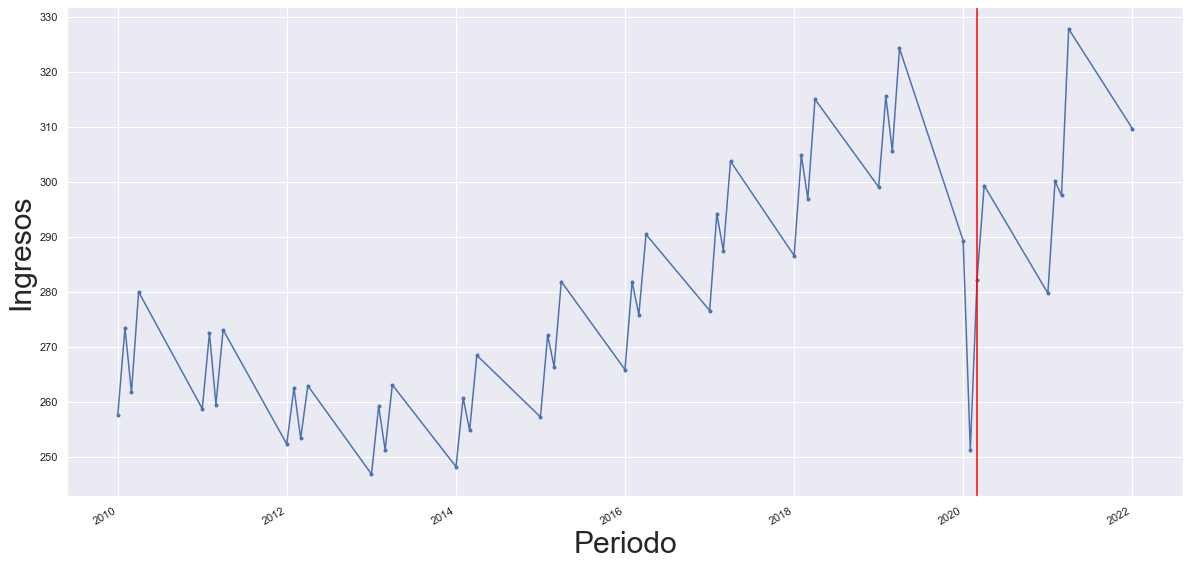

In [35]:
# Ploteamos nuestra serie temporal:
sns.set(rc={'figure.figsize':(20, 10)})
fig = df_pib['Total'].plot(marker='.') 
fig.set_ylabel('Ingresos', fontsize = 30)
fig.axvline('2020-03-01', color = 'red', linewidth= 1.5)
fig.set_xlabel('Periodo', fontsize = 30);

In [36]:
def split_and_summarize(dataframe, column, size, fn):
    ranges = []
    values = []
    for i in range(0, len(dataframe), size):
        ranges.append(dataframe[i:i + size])
    for i in ranges:
        values.append(fn(i[column]))
    return(values)

In [38]:
mean = split_and_summarize(df_pib, 'Total', 4, np.mean)
variance = split_and_summarize(df_pib, 'Total', 4, np.var)

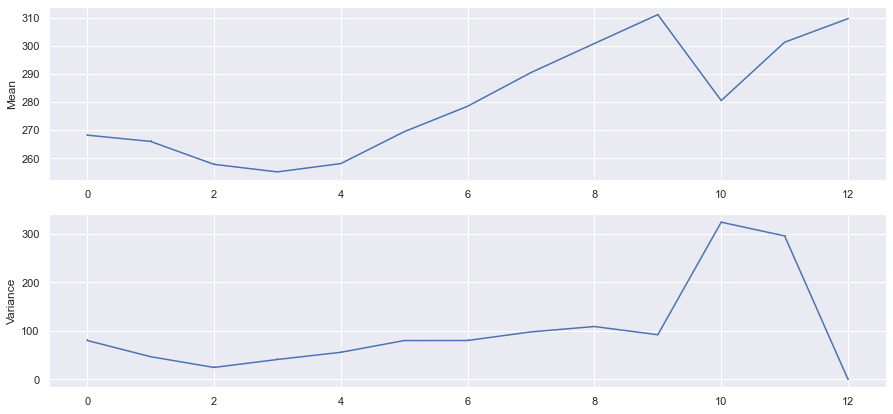

In [39]:
cols = ['mean', 'variance']
df = pd.DataFrame([mean, variance], index=cols)

sns.set(rc={'figure.figsize':(15, 7)})
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(mean, ',-')
ax1.set_ylabel('Mean')

ax2.plot(variance, ',-')
ax2.set_ylabel('Variance')

plt.show()

AttributeError: 'NoneType' object has no attribute 'startswith'

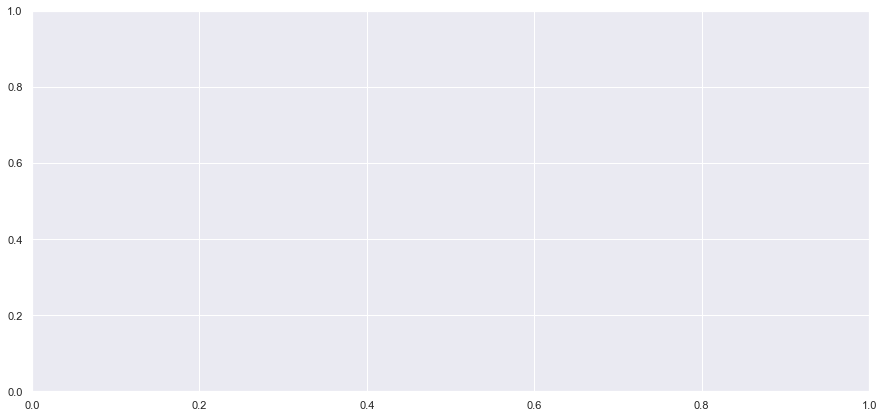

In [42]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(df_pib['Total'], ax=ax)
ax.set_title('Comportamiento Estacional');

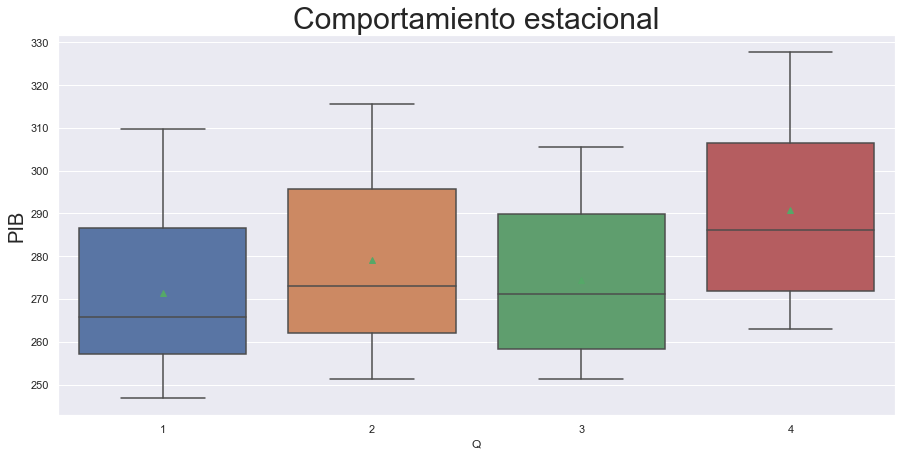

In [47]:
df_pib['Q'] = df_pib.index.month
sns.boxplot(data = df_pib, x = 'Q', y='Total', showmeans=True)
ax = plt.gca()
ax.set_ylabel('PIB', fontsize = 20)
ax.set_title('Comportamiento estacional', fontsize = 30);


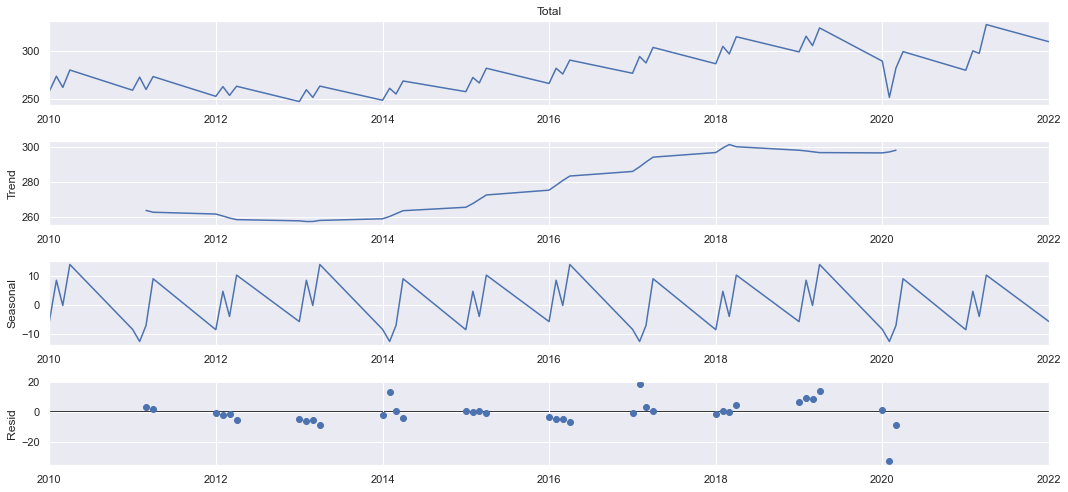

In [48]:
desglose = seasonal_decompose(df_pib['Total'], 
                                   model='additive', 
                                   period=12);
desglose.plot();